# Tarea 1 Redes Neuronales Artificiales

Andrea Figueroa, 
Alejandro Sazo

## Ejercicio 1

(a) Generación de data aleatoria que represente la función lógica $xor$. Se generan 1000 datos de prueba y 1000 de entrenamiento.

In [18]:
# Importar Librerías
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.optimizers import SGD

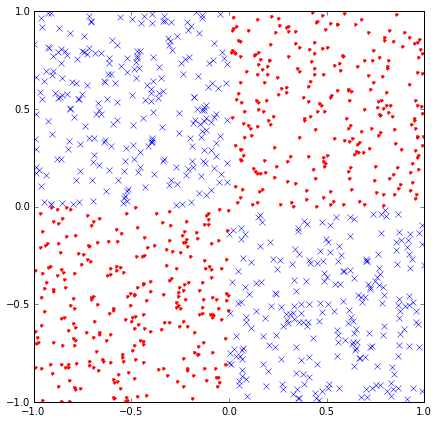

In [15]:
# Guardar semilla para numeros aleatorios
seed = 21
np.random.seed(seed)

def generate_data(n):
    
    # Lista para guardar datos etiquetados
    output = list()
    
    # Generación de n tuplas aleatorias
    input = 2 * np.random.random_sample((n,2)) - 1
    # Asignación datos dependiendo del cuadrante
    for i in input:
        # Cuadrante 1
        if i[0] > 0 and i[1] > 0:
            output.append(0)
        # Cuadrante 2
        elif i[0] < 0 and i[1] > 0: 
            output.append(1)
        # Cuadrante 3
        elif i[0] < 0 and i[1] < 0: 
            output.append(0)
        # Cuadrante 4
        elif i[0] > 0 and i[1] < 0: 
            output.append(1)
    return input, output

(x_training, y_training) = generate_data(1000)
(x_test, y_test) = generate_data(1000)

# Plot de datos de entrenamiento
%matplotlib inline
plt.figure(figsize=(7,7))
set1 = x_training[np.logical_and(x_training[:,0] < 0, x_training[:,1] < 0)]
set2 = x_training[np.logical_and(x_training[:,0] < 0, x_training[:,1] > 0)]
set3 = x_training[np.logical_and(x_training[:,0] > 0, x_training[:,1] > 0)]
set4 = x_training[np.logical_and(x_training[:,0] > 0, x_training[:,1] < 0)]
set1 = np.concatenate((set1, set3), axis=0)
set2 = np.concatenate((set2, set4), axis=0)
plt.plot(set1[:,0], set1[:,1], 'r.')
plt.plot(set2[:,0], set2[:,1], 'bx')
plt.show()

(b) Generación de una neurona. Ha sido entrenada con 1000 epochs.

In [16]:
# Creación de una neurona
model = Sequential()

# Dimensión input = 1, Dimensión output = 2, función de activación es Relu
model.add(Dense(output_dim=1, input_dim=2, init="normal"))
model.add(Activation("sigmoid"))
model.compile(loss='mean_squared_error', optimizer='sgd')

print "Neurona inicializada"

# Entrenar a la neurona
model.fit(x_training, y_training, nb_epoch=1000,verbose=0)

print "Neurona entrenada"

# Evaluar la neurona
loss_and_metrics = model.evaluate(x_test, y_test, batch_size=1000)
print loss_and_metrics

Neurona inicializada
Neurona entrenada
1000/1000 [==============================] - 0s
0.249790877104


In [17]:
print round(model.predict(np.array([-1,-1]).reshape(1,2))[0][0],4)
print round(model.predict(np.array([1,1]).reshape(1,2))[0][0],4)
print round(model.predict(np.array([-1,1]).reshape(1,2))[0][0],4)
print round(model.predict(np.array([1,-1]).reshape(1,2))[0][0],4)

0.467
0.4841
0.4714
0.4796


In [18]:
# Ejercicio 1.3

from keras.models import Sequential
from keras.layers.core import Dense, Activation

# Creación de una neurona
xor = Sequential()

# Dimensión input = 1, Dimensión output = 2, función de activación es Relu
xor.add(Dense(8, input_dim = 2, activation = "relu"))
xor.add(Dense(1, activation = "sigmoid"))
xor.compile(loss='mean_squared_error', optimizer='adam')

print "Neurona inicializada"

# Entrenar a la neurona
xor.fit(x_training, y_training, nb_epoch=1000, verbose=0)

print "Neurona entrenada"

# Evaluar la neurona
evaluacion = xor.evaluate(x_test, y_test, batch_size=1000)
print evaluacion

Neurona inicializada
Neurona entrenada
1000/1000 [==============================] - 0s
0.0120901726186


In [19]:
print round(xor.predict(np.array([-1,-1]).reshape(1,2))[0][0],4)
print round(xor.predict(np.array([1,1]).reshape(1,2))[0][0],4)
print round(xor.predict(np.array([-1,1]).reshape(1,2))[0][0],4)
print round(xor.predict(np.array([1,-1]).reshape(1,2))[0][0],4)

0.0
0.0
1.0
1.0


## Ejercicio 2

(a) Construcción del dataframe para el set Boston Housing. Este set se divide para generar el training set y el testing set. Del total de datos, el 25% se deja aparte para pruebas y el restante 75% permanece para entrenamiento.

In [20]:
import pandas as pd
url = 'http://mldata.org/repository/data/download/csv/regression-datasets-housing/'
df = pd.read_csv(url, sep=',',header=None, names=['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX',
'RM', 'AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT','MEDV'])
from sklearn.cross_validation import train_test_split
df_train, df_test = train_test_split(df,test_size=0.25, random_state=0)

(b) Descripción del dataset.

In [21]:
df.shape
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM       506 non-null float64
ZN         506 non-null int64
INDUS      506 non-null float64
CHAS       506 non-null int64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null int64
TAX        506 non-null int64
PTRATIO    506 non-null int64
B          506 non-null float64
LSTAT      506 non-null float64
MEDV       506 non-null float64
dtypes: float64(9), int64(5)
memory usage: 59.3 KB


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.347826,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.083004,356.674032,12.653063,22.532806
std,8.601545,23.310593,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.280574,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.000000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.000000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.000000,391.440000,11.360000,21.200000
75%,3.677082,12.000000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.000000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


c) Normalización de datos. Este procedimiento es necesario para (completalo andrea).

In [31]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(df_train)
X_train_scaled = pd.DataFrame(scaler.transform(df_train),columns=df_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(df_test),columns=df_test.columns)
y_train_scaled = X_train_scaled.pop('MEDV')
y_test_scaled = X_test_scaled.pop('MEDV')

d) Gráfico de MSE versus número de epochs utilizados para entrenar para red FF de 3 capas, 200 unidades ocultas y activación sigmoidal entrenada con SGD con parámetros $\eta$=0.2 y 300 epochs de entrenamiento.

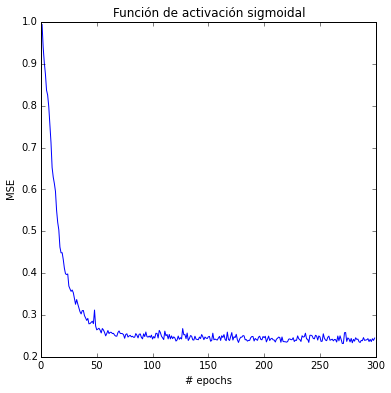

In [32]:
model = Sequential()
model.add(Dense(200, input_dim=X_train_scaled.shape[1], init='uniform'))
model.add(Activation('sigmoid'))
model.add(Dense(1, init='uniform'))
model.add(Activation('linear'))

sgd = SGD(lr=0.2)
model.compile(optimizer='sgd',loss='mean_squared_error')

hist = model.fit(X_train_scaled.as_matrix(), y_train_scaled.as_matrix(), 
                 nb_epoch=300, verbose=0, 
                 validation_data=(X_test_scaled.as_matrix(), y_test_scaled.as_matrix()))

%matplotlib inline
epochs = np.arange(300)
plt.figure(figsize=(6,6))
plt.plot(epochs, hist.history['loss'], 'b-')
plt.title(u"Función de activación sigmoidal")
plt.xlabel("# epochs")
plt.ylabel("MSE")
plt.show()

e) Variar función de activación cambiandola por ReLu.

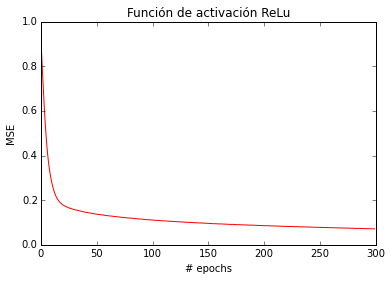

In [66]:
model2 = Sequential()
model2.add(Dense(200, input_dim=X_train_scaled.shape[1], init='uniform'))
model2.add(Activation('relu'))
model2.add(Dense(1, init='uniform'))
model2.add(Activation('linear'))

sgd = SGD(lr=0.2)
model2.compile(optimizer='sgd',loss='mean_squared_error')

hist2 = model2.fit(X_train_scaled.as_matrix(), y_train_scaled.as_matrix(), 
                   nb_epoch=300, verbose=0, 
                   validation_data=(X_test_scaled.as_matrix(), y_test_scaled.as_matrix()))

%matplotlib inline
epochs = np.arange(300)
plt.plot(epochs, hist2.history['loss'], 'r-')
plt.title(u"Función de activación ReLu")
plt.xlabel("# epochs")
plt.ylabel("MSE")
plt.show()

f) Variar learning rate

In [59]:
n_lr = 20
lear_rate = np.linspace(0,1,n_lr)
# La andrea lo va a hacer Firma:andrea 11:41
# Modularizar modelo de d) para poder cambiar la función de activación y learning rate
# Plotear fuera del for

g) Validación cruzada variando el número de folds

In [ ]:
from sklearn import cross_validation

Xm = X_train_scaled.as_matrix()
ym = y_train_scaled.as_matrix()
kfold = cross_validation.KFold(len(Xm), 10)
cvscores = []
for i, (train, val) in enumerate(kfold):
    # create model
    model = Sequential()
    model.add(Dense(200, input_dim=Xm.shape[1], init='uniform'))
    model.add(Activation('relu'))
    model.add(Dense(1, init='uniform'))
    model.add(Activation('linear'))
    # Compile model
    sgd = SGD(lr=0.2)
    model.compile(optimizer='sgd',loss='mean_squared_error')
    # Fit the model
    model.fit(Xm[train], ym[train], nb_epoch=300)
    # evaluate the model
    scores = model.evaluate(Xm[val], ym[val])
    cvscores.append(scores)

mse_cv = np.mean(cvscores)

Epoch 1/300
341/341 [==============================] - 0s - loss: 0.9639     
Epoch 2/300
341/341 [==============================] - 0s - loss: 0.8661     
Epoch 3/300
341/341 [==============================] - 0s - loss: 0.7756     
Epoch 4/300
341/341 [==============================] - 0s - loss: 0.6866     
Epoch 5/300
341/341 [==============================] - 0s - loss: 0.6029     
Epoch 6/300
341/341 [==============================] - 0s - loss: 0.5270     
Epoch 7/300
341/341 [==============================] - 0s - loss: 0.4636     
Epoch 8/300
341/341 [==============================] - 0s - loss: 0.4108     
Epoch 9/300
341/341 [==============================] - 0s - loss: 0.3683     
Epoch 10/300
341/341 [==============================] - 0s - loss: 0.3325     
Epoch 11/300
341/341 [==============================] - 0s - loss: 0.3057     
Epoch 12/300
341/341 [==============================] - 0s - loss: 0.2817     
Epoch 13/300
341/341 [==============================] - 0s - 

## Ejercicio 3

a) La función $\texttt{load_CIFAR10}$ permite generar el training set, testing set y validation set a partir de los datos de CIFAR

In [4]:
import cPickle as pickle
import os
from scipy.misc import imread
# Inicializar semilla aleatoria
np.random.seed(20)

# Carga de un archivo de CIFAR
def load_CIFAR_one(filename):
    with open(filename, 'rb') as f:
        datadict = pickle.load(f)
        X = datadict['data']
        Y = datadict['labels']
        Y = np.array(Y)
        return X, Y

# Carga todos los archivos CIFAR y generar Training set, Testing set y Validation set
def load_CIFAR10(PATH, n_files=6):
    xs = []
    ys = []
    # Juntar toda la data de entrenamiento
    for b in range(1, n_files):
        f = os.path.join(PATH, 'data_batch_%d' % (b, ))
        X, Y = load_CIFAR_one(f)
        xs.append(X)
        ys.append(Y)
    Xtr = np.concatenate(xs)
    Ytr = np.concatenate(ys)
    del X, Y
    # Obtener subconjunto para validacion a partir de data de entrenamiento
    v_size = np.random.randint(1000, 5000)
    indices = np.random.choice(np.arange(Xtr.shape[0]), v_size)
    mask_tr = np.ones(Xtr.shape[0], dtype=bool)
    mask_tr[indices] = False
    mask_v = np.invert(mask_tr)
    Xv = Xtr[mask_v]
    Yv = Ytr[mask_v]
    Xtr = Xtr[mask_tr]
    Ytr = Ytr[mask_tr]
    # Obtener data de prueba
    Xte, Yte = load_CIFAR_one(os.path.join(PATH, 'test_batch'))
    return Xtr, Ytr, Xte, Yte, Xv, Yv

# Cargar desde carpeta local data
Xtr, Ytr, Xte, Yte, Xv, Yv = load_CIFAR10("data")

b) Escalamiento y centrado de datos

In [55]:
from sklearn.preprocessing import StandardScaler

# Centrar dataset y escalar segun preferencia
def preprocess(X, with_mean=True, with_std=True):
    scaler = StandardScaler(with_mean, with_std).fit(X)
    return scaler.transform(X)

# Data solo centrada
#Xtr_c = preprocess(Xtr, with_mean=True, with_std=False)
# Data solo escalada
#Xtr_s = preprocess(Xtr, with_mean=False, with_std=True)
# Data centrada y escalada

# Centrar y escalar datos de entrenamiento y validación
Xtr_cs = preprocess(Xtr)
Xv_cs = preprocess(Xv)
Xte_cs = preprocess(Xte)

/usr/lib64/python2.7/site-packages/sklearn/utils/validation.py:420: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/usr/lib64/python2.7/site-packages/sklearn/utils/validation.py:420: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/usr/lib64/python2.7/site-packages/sklearn/utils/validation.py:420: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/usr/lib64/python2.7/site-packages/sklearn/utils/validation.py:420: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/usr/lib64/python2.7/site-packages/sklearn/utils/validation.py:420: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warning

c) Creación de red neuronal para problema CIFAR. En primer lugar se adaptan las etiquetas a una representación manejable por la red.

In [56]:
# Dimension de ejemplos, vectores de 3072 features (32x32x3 pixeles)
input_dim = Xtr.shape[1]
from keras.utils.np_utils import to_categorical
Ytr_conv = to_categorical(Ytr,10)
Yv_conv = to_categorical(Yv,10)
Yte_conv = to_categorical(Yte,10)

In [57]:
# Modelo 1: Red simple de 1 capa
MLPmodel = Sequential()
MLPmodel.add(Dense(50, input_dim=input_dim, init='uniform'))
MLPmodel.add(Activation('relu'))
MLPmodel.add(Dense(10))
MLPmodel.add(Activation('softmax'))
sgd = SGD(lr=0.1, decay=1e-6, momentum=0.9, nesterov=False)
MLPmodel.compile(loss='mse',
              optimizer=sgd,
              metrics=['accuracy'])

In [58]:
MLPmodel.fit(Xtr_cs, Ytr_conv, nb_epoch=20, batch_size=16, verbose=0)

In [59]:
score = MLPmodel.evaluate(Xv_cs, Yv_conv,verbose=0, batch_size=16)
print "Loss:",score[0], "Accuracy:",score[1]

Loss: 0.136033154367 Accuracy: 0.234371285987


In [60]:
# Modelo 2
# Combinacion de capas con activaciones tangente hiperbolica, momentum utilizando nesterov
model2 = Sequential()
model2.add(Dense(50, input_dim=input_dim, init='uniform'))
model2.add(Activation('tanh'))
model2.add(Dense(50, init='uniform'))
model2.add(Activation('tanh'))
model2.add(Dense(10, init='uniform'))
model2.add(Activation('softmax'))
sgd = SGD(lr=0.1, decay=1e-6, momentum=0.8, nesterov=True)
model2.compile(loss='mse',
              optimizer=sgd,
              metrics=['accuracy'])

In [62]:
model2.fit(Xtr_cs, Ytr_conv, nb_epoch=20, batch_size=32, verbose=0)

In [63]:
score = model2.evaluate(Xv_cs, Yv_conv, batch_size=32, verbose=0)
print "Loss:",score[0], "Accuracy:",score[1]

Loss: 0.070785757396 Accuracy: 0.444259567395


In [64]:
# Modelo 3
# Combinación anterior cambiando funciones tanh por sigmoidales y perdida entropia cruzada
model3 = Sequential()
model3.add(Dense(50, input_dim=input_dim, init='uniform'))
model3.add(Activation('sigmoid'))
model3.add(Dense(50, init='uniform'))
model3.add(Activation('sigmoid'))
model3.add(Dense(10, init='uniform'))
model3.add(Activation('softmax'))
sgd = SGD(lr=0.1, decay=1e-6, momentum=0.8, nesterov=True)
model3.compile(loss='categorical_crossentropy',
              optimizer=sgd,
              metrics=['accuracy'])

In [66]:
model3.fit(Xtr_cs, Ytr_conv, nb_epoch=20, batch_size=32, verbose=0)

In [67]:
score = model3.evaluate(Xv_cs, Yv_conv, batch_size=32, verbose=0)
print "Loss:",score[0], "Accuracy:",score[1]

Loss: 1.56969037471 Accuracy: 0.450677442457
